# Quick start

Learn how to download an MNISQ data set and embed it in a quantum state with qiskit.

In [ ]:
!pip install qiskit
!wget https://qulacs-quantum-datasets.s3.us-west-1.amazonaws.com/base_test_mnist_784_f90.zip
!unzip base_test_mnist_784_f90.zip

This dataset contains the following information:
- `state`: Amplitude-encoded quantum state from original data
- `circuit`: `state` with a finite number of two-qubit density operators
- `qasm`: QASM representation of `circuit`
- `fidelity`: the square of the inner product of the quantum state created from `state`
-`label`: label

Let's look at 5 sheets of information from the dataset.

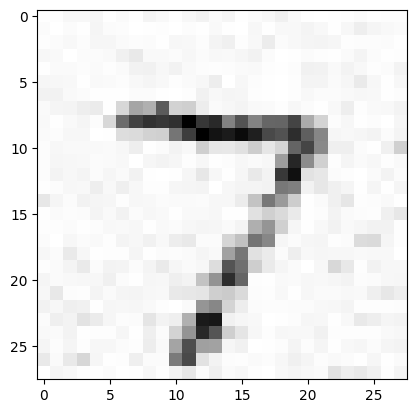

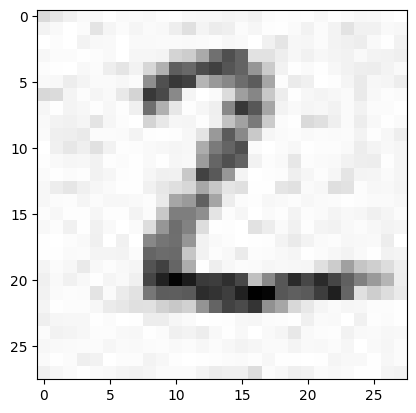

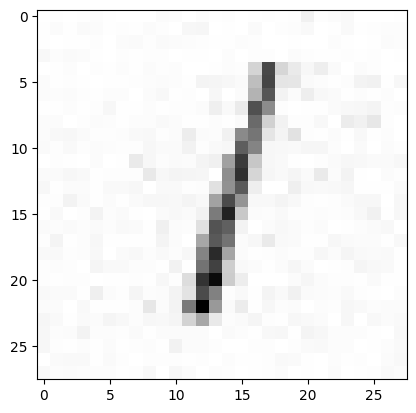

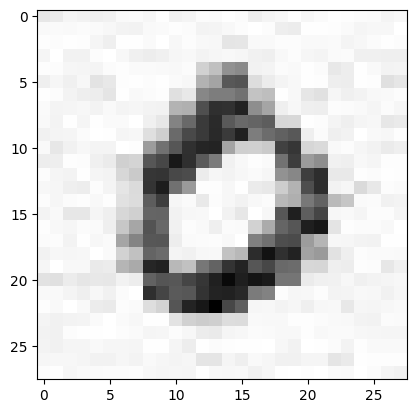

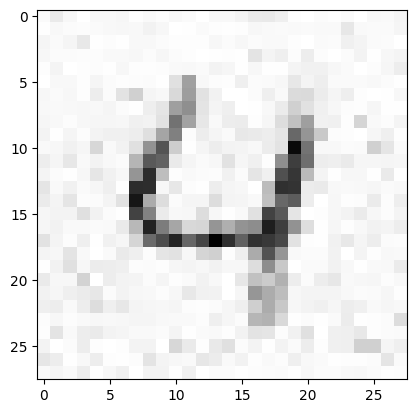

In [5]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import matplotlib.pyplot as plt

path = "base_test_mnist_784_f90/qasm/"

def show_figure(pict: np.array):
    plt.imshow(pict.reshape(28, 28), cmap="Greys")
    plt.show()

def show_state_figure(state):
    pict = state
    result = []
    for x in range(28 * 28):
        result.append(abs(pict[x]))
    show_figure(np.array(result))

for i in range(5):
    with open(path + str(i)) as f:
        qasm = f.read()
        qc = QuantumCircuit.from_qasm_str(qasm)
        backend = Aer.get_backend("statevector_simulator")
        job = execute(qc, backend)
        result = job.result()
        state = result.get_statevector(qc)
        show_state_figure(state)
